## Project in Data Analysis: Tip Amount Prediction

In [2]:
# importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


In [3]:
# Reading the dataset using pandas
data=pd.read_csv('Taxi_cab_data.csv')

In [3]:
# we check here the dataset structure
data.shape

(28454, 23)

- We can see that our dataset has:
     - 28454 rows
     - 23 columns

In [4]:
#using head() we can take first 5 rows with all columns
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:00:29,2016-02-01 00:08:40,1,1.7,-73.977036,40.743099,1,N,...,8.5,0.5,0.5,2.45,0.0,0.3,12.25,True,True,False
1,2,1,2016-02-19 20:53:37,2016-02-19 21:00:01,1,1.0,-73.985992,40.754925,1,N,...,6.0,0.5,0.5,1.45,0.0,0.3,8.75,False,True,False
2,3,1,2016-02-19 20:53:40,2016-02-19 20:58:33,1,0.7,-73.975121,40.756203,1,N,...,5.0,0.5,0.5,1.25,0.0,0.3,7.55,False,True,False
3,4,1,2016-02-19 20:53:46,2016-02-19 21:08:49,1,4.4,-74.008888,40.711056,1,N,...,16.5,0.5,0.5,3.55,0.0,0.3,21.35,True,True,False
4,5,1,2016-02-19 20:53:53,2016-02-19 20:57:22,3,0.5,-73.986649,40.750137,1,N,...,4.5,0.5,0.5,0.00,0.0,0.3,5.80,False,True,True


In [5]:
# we will get information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

- Using info() function we will get information about our dataset:
    - Range index that represents number of rows.
    - Columns' names and their datatypes
    - Dtypes that tells us exactly the number of data type for each data type
    - Memory usage

In [6]:

data = pd.read_csv(r'C:\Users\arben\OneDrive\Desktop\Data Analytics\exam_data.csv', parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:00:29,2016-02-01 00:08:40,1,1.7,-73.977036,40.743099,1,N,...,8.5,0.5,0.5,2.45,0.0,0.3,12.25,True,True,False
1,2,1,2016-02-19 20:53:37,2016-02-19 21:00:01,1,1.0,-73.985992,40.754925,1,N,...,6.0,0.5,0.5,1.45,0.0,0.3,8.75,False,True,False
2,3,1,2016-02-19 20:53:40,2016-02-19 20:58:33,1,0.7,-73.975121,40.756203,1,N,...,5.0,0.5,0.5,1.25,0.0,0.3,7.55,False,True,False
3,4,1,2016-02-19 20:53:46,2016-02-19 21:08:49,1,4.4,-74.008888,40.711056,1,N,...,16.5,0.5,0.5,3.55,0.0,0.3,21.35,True,True,False
4,5,1,2016-02-19 20:53:53,2016-02-19 20:57:22,3,0.5,-73.986649,40.750137,1,N,...,4.5,0.5,0.5,0.00,0.0,0.3,5.80,False,True,True


In [7]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.536831,1.664581,2.840451,-72.840667,40.126639,1.036761,-72.889962,40.154289,1.332994,12.362209,0.336561,0.497206,1.758238,0.288051,0.299599,15.541863
std,8214.106616,0.498650,1.323009,3.578555,9.086775,5.005778,0.284411,8.889577,4.897235,0.489006,10.829515,0.443805,0.040871,2.423491,1.388025,0.014875,13.212557
min,1.000000,1.000000,0.000000,0.000000,-74.325806,0.000000,1.000000,-74.408539,0.000000,1.000000,-52.000000,-1.000000,-0.500000,-1.290000,0.000000,-0.300000,-52.800000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991737,40.736601,1.000000,-73.991453,40.734249,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.630000,-73.981697,40.753212,1.000000,-73.980087,40.753422,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,21340.750000,2.000000,2.000000,3.000000,-73.967133,40.767328,1.000000,-73.962990,40.768639,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.000000
max,28454.000000,2.000000,6.000000,84.800000,0.000000,41.275917,6.000000,0.000000,41.275917,4.000000,450.000000,4.500000,0.500000,135.000000,44.470000,0.300000,450.300000


In [8]:
#checking for duplicates
data.duplicated().sum()

0

#### Some findings:
 - Some travel points are not within the geographic coordinates of New York city.
 - Negative minimum fare_amount value, which is not possible.
 - Negative minimum tip_amount value, which does not make comprehension.
 - Passenger_count  minimum value is 0 which does not make any meaning.

# Data Preprocessing  and Feature Engineering

##### Checking if we have data that do not have values.

In [9]:
#checking for null values
data.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64

In [10]:
#using  len() we can check the number of rows
print(len(data))

28454


In [11]:
#getting the dataset columns and their names
data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'GoodTip',
       'Extra', 'Cash'],
      dtype='object')

In [12]:
# let take the targeting value and describe its features
data.tip_amount.describe()

count    28454.000000
mean         1.758238
std          2.423491
min         -1.290000
25%          0.000000
50%          1.350000
75%          2.350000
max        135.000000
Name: tip_amount, dtype: float64

##### Tip amount  
- Tip amount values that are negative do not have any comprehand meaning so we should remove them.
- Tip amount values that are zero indicate cases when we did not have tip amounts.

In [13]:
#we have to remove negative values, they do not make any comprehension.
data=data.drop(data[data['tip_amount']<0].index, axis=0)

In [14]:
data.tip_amount.describe()

count    28452.000000
mean         1.758433
std          2.423463
min          0.000000
25%          0.000000
50%          1.350000
75%          2.350000
max        135.000000
Name: tip_amount, dtype: float64

### Fare amount limits
- there should not be any negative fare values. 
- you should not be able to pay more than  a certain limit depending on the circumstances.Let say the maximum limit is 250 dollars
- The minimum fare amount for a New York Taxi is 2.5$

In [15]:
data.fare_amount.describe()

count    28452.000000
mean        12.363254
std         10.829178
min        -52.000000
25%          6.500000
50%          9.000000
75%         14.000000
max        450.000000
Name: fare_amount, dtype: float64

In [16]:

data = data.drop(data[data.fare_amount<2.5].index, axis = 0)
data = data.drop(data[data.fare_amount>250].index, axis = 0)



### Passenger Count
- Passenger count equals to zero does not have meaning so we remove it.

In [17]:
round(data.passenger_count.describe(),3)

count    28422.000
mean         1.665
std          1.323
min          0.000
25%          1.000
50%          1.000
75%          2.000
max          6.000
Name: passenger_count, dtype: float64

In [18]:
data= data.drop(data[data.passenger_count<1].index, axis=0)

In [19]:
data.passenger_count.describe()

count    28421.000000
mean         1.664790
std          1.323121
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

### Trip_Distance
- Distance zero does not have meaning since the fare_amount is negative and also the payment is done. 

In [20]:
data.trip_distance.describe()

count    28421.000000
mean         2.842152
std          3.576918
min          0.000000
25%          1.000000
50%          1.630000
75%          3.000000
max         84.800000
Name: trip_distance, dtype: float64

In [21]:
### Trip distance zero does not make sense we should remove
data= data.drop(data[data.trip_distance<1].index, axis=0)
data.trip_distance.describe()

count    21353.000000
mean         3.564732
std          3.861776
min          1.000000
25%          1.430000
50%          2.120000
75%          3.790000
max         84.800000
Name: trip_distance, dtype: float64

In [22]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000
mean,14239.032642,1.536646,1.671849,3.564732,-72.898762,40.158276,1.035311,-73.023344,40.227532,1.303377,14.506641,0.346883,0.498150,2.062977,0.377161,0.299986,18.091797
std,8228.675016,0.498667,1.328733,3.861776,8.848341,4.874382,0.241508,8.325817,4.586651,0.471595,10.702020,0.456682,0.030357,2.480305,1.574037,0.002053,13.397924
min,1.000000,1.000000,1.000000,1.000000,-74.183060,0.000000,1.000000,-74.408539,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000
25%,7044.000000,1.000000,1.000000,1.430000,-73.992027,40.734821,1.000000,-73.991531,40.731564,1.000000,8.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.500000
50%,14237.000000,2.000000,1.000000,2.120000,-73.981697,40.752537,1.000000,-73.979645,40.752758,1.000000,11.000000,0.500000,0.500000,1.750000,0.000000,0.300000,13.560000
75%,21395.000000,2.000000,2.000000,3.790000,-73.966888,40.767189,1.000000,-73.961311,40.769024,2.000000,16.000000,0.500000,0.500000,2.760000,0.000000,0.300000,19.560000
max,28454.000000,2.000000,6.000000,84.800000,0.000000,40.874565,5.000000,0.000000,41.101425,4.000000,187.000000,4.500000,0.500000,43.660000,44.470000,0.300000,231.390000


### Payment_type

- As you can see the values are skewed
- I decide to reduce the number of values and  scale on that column by using the map function.

In [23]:
"""Payment_type is a numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip """

data.payment_type.value_counts()

1    14973
2     6302
3       58
4       20
Name: payment_type, dtype: int64

In [24]:
data['payment_type']= data['payment_type'].map({1:1, 2:2, 3:2, 4:2})

In [25]:
data.payment_type.value_counts()

1    14973
2     6380
Name: payment_type, dtype: int64

### Store_and_fwd_flag 
- As you can see the values are textual boolean so I decided to map text values with numerical ones.

In [26]:
data.store_and_fwd_flag.value_counts()

N    21225
Y      128
Name: store_and_fwd_flag, dtype: int64

In [27]:
data['store_and_fwd_flag']= data['store_and_fwd_flag'].map({'N':0, 'Y':1})

In [28]:
data['store_and_fwd_flag'].value_counts()

0    21225
1      128
Name: store_and_fwd_flag, dtype: int64

### RateCodeID processing
- According to data dictionnary provided to detail each of the columns, the final rate code in effect at the end of the trip.
  - 1= Standard rate
  - 2=JFK
  - 3=Newark
  - 4=Nassau or Westchester
  - 5=Negotiated fare
  - 6=Group ride

In [29]:
data.RatecodeID.value_counts()

1    20759
2      503
3       52
5       30
4        9
Name: RatecodeID, dtype: int64

### Trip duration creation and processing:
- In this task, I will create a new feature called trip_duration
- It will be calculated from the difference between the dropoff time and the pickup time and I express the value in minutes unit as shown below:



In [30]:
df=data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']
data['trip_duration']=df/np.timedelta64(1,'m')

- The next step I have decided to do is to create trip durations classes and intevals based on the freshly created column.
- The decided intervals are belows:
   - less than 5 minutes
   - 5–10 minutes
   - 10–15 minutes
   - 15–20 minutes
   - greater than 20 minutes

In [31]:
bins=np.array([0,5,10,15,20,45])
data['trip_duration']=pd.cut(data.trip_duration,bins,labels=['<5', '5-10','10-15','15-20','>20'])

data['trip_duration'].value_counts()

5-10     6139
10-15    5834
>20      4609
15-20    3649
<5        686
Name: trip_duration, dtype: int64

- I will use the get_dummies function in order to convert trip_duration categorical variable into dummy/indicator variables as part of the One Hot Encoding. The aim of this transformation is to convert categorical values into a 1-dimensional numerical vector.

In [32]:
trip_duration = pd.get_dummies(data['trip_duration'])

In [33]:
trip_duration.head()

,<5,5-10,10-15,15-20,>20
0,0,1,0,0,0
1,0,1,0,0,0
3,0,0,0,1,0
5,0,0,0,0,1
6,1,0,0,0,0


- As you can see above, I have converted the trip_duration into its 5 elements one-hot encoded vector now represented as 5 columns each with the categorical values I passed to the get_dummies function.

- To add these 5 columns to my original data frame I have used the concat function as below and then I have renamed them:

In [34]:
quick_trip = trip_duration.iloc[:,:1].max(axis=1)
very_short_trip = trip_duration.iloc[:,:2].max(axis=1)
short_trip = trip_duration.iloc[:,:3].max(axis=1)
medium_trip = trip_duration.iloc[:,:4].max(axis=1)
long_trip = trip_duration.iloc[:,:5].max(axis=1)

In [35]:
trip_duration.columns=['quick_trip','very_short_trip','short_trip','medium_trip','long_trip']

In [36]:
data=pd.concat([data, quick_trip, very_short_trip, short_trip, medium_trip, long_trip], axis = 1)

In [37]:
data.columns=['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'GoodTip',
       'Extra', 'Cash','trip_duration','quick_trip','very_short_trip','short_trip','medium_trip','long_trip']

In [38]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,quick_trip,very_short_trip,short_trip,medium_trip,long_trip
count,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,...,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000,21353.000000
mean,14239.032642,1.536646,1.671849,3.564732,-72.898762,40.158276,1.035311,0.005994,-73.023344,40.227532,...,0.498150,2.062977,0.377161,0.299986,18.091797,0.032127,0.319627,0.592844,0.763733,0.979581
std,8228.675016,0.498667,1.328733,3.861776,8.848341,4.874382,0.241508,0.077193,8.325817,4.586651,...,0.030357,2.480305,1.574037,0.002053,13.397924,0.176340,0.466343,0.491316,0.424798,0.141431
min,1.000000,1.000000,1.000000,1.000000,-74.183060,0.000000,1.000000,0.000000,-74.408539,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7044.000000,1.000000,1.000000,1.430000,-73.992027,40.734821,1.000000,0.000000,-73.991531,40.731564,...,0.500000,0.000000,0.000000,0.300000,10.500000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,14237.000000,2.000000,1.000000,2.120000,-73.981697,40.752537,1.000000,0.000000,-73.979645,40.752758,...,0.500000,1.750000,0.000000,0.300000,13.560000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,21395.000000,2.000000,2.000000,3.790000,-73.966888,40.767189,1.000000,0.000000,-73.961311,40.769024,...,0.500000,2.760000,0.000000,0.300000,19.560000,0.000000,1.000000,1.000000,1.000000,1.000000
max,28454.000000,2.000000,6.000000,84.800000,0.000000,40.874565,5.000000,1.000000,0.000000,41.101425,...,0.500000,43.660000,44.470000,0.300000,231.390000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Geographic coordinates of  New York 
- The city of New York longitude ranges between -75 and -72. The latitude ranges between 40 and 42. There are a few points in the dataset that lie outside these bounds. These points will be removed since they are not within the boundaries of the city.

In [39]:
def selecting_coordinates_NYC(df, GC):
    
    """this function will filter the geographic coordinates of location"""
       
    filter_df = df.loc[(df['pickup_longitude'] < GC[0]) | (df['pickup_longitude'] > GC[1]) |\
              (df['pickup_latitude'] < GC[2]) | (df['pickup_latitude'] > GC[3]) | \
              (df['dropoff_longitude'] < GC[0]) | (df['dropoff_longitude'] > GC[1]) | \
              (df['dropoff_latitude'] < GC[2]) | (df['dropoff_latitude'] > GC[3])]
       
    return filter_df

NYC_GC = (-75, -72, 40, 42)

                            

In [40]:
outliers= selecting_coordinates_NYC(data,NYC_GC)
outliers

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,total_amount,GoodTip,Extra,Cash,trip_duration,quick_trip,very_short_trip,short_trip,medium_trip,long_trip
16,17,1,2016-02-19 21:10:29,2016-02-19 21:33:11,1,11.30,-73.986961,40.761066,1,0,...,34.30,False,True,False,>20,0,0,0,0,1
108,109,1,2016-02-19 22:36:20,2016-02-19 22:47:56,1,1.30,0.000000,0.000000,1,0,...,12.35,True,True,False,10-15,0,0,1,1,1
304,305,2,2016-02-01 10:22:32,2016-02-01 11:05:16,6,21.98,0.000000,0.000000,1,0,...,60.30,False,False,False,>20,0,0,0,0,1
437,438,1,2016-02-05 13:00:44,2016-02-05 13:10:45,1,1.60,0.000000,0.000000,1,0,...,11.15,True,False,False,10-15,0,0,1,1,1
463,464,1,2016-02-01 13:32:57,2016-02-01 13:40:53,1,2.10,0.000000,0.000000,1,0,...,11.15,True,False,False,5-10,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27694,27695,2,2016-02-27 15:23:41,2016-02-27 15:31:10,1,1.25,0.000000,0.000000,1,0,...,8.97,False,False,False,5-10,0,1,1,1,1
27808,27809,2,2016-02-27 19:08:58,2016-02-27 19:19:13,5,1.79,0.000000,0.000000,1,0,...,9.80,False,False,True,10-15,0,0,1,1,1
28004,28005,2,2016-02-28 00:59:04,2016-02-28 01:06:18,1,1.03,0.000000,0.000000,1,0,...,7.80,False,True,True,5-10,0,1,1,1,1
28074,28075,2,2016-02-28 03:55:05,2016-02-28 04:04:38,1,3.33,0.000000,0.000000,1,0,...,14.76,True,True,False,5-10,0,1,1,1,1


In [41]:
data=data.drop(outliers.index, axis=0)

### Distance between two geolocations
- Using the start point and end point we can have an understanding of displacment distance.
- We will use the Haversine formula to calculate the distance between two geolocations.
- We can use also Chebyshev method to calculate the distance.

In [42]:
data["loc_1"] = data[["pickup_latitude","pickup_longitude"]].apply(tuple, axis=1)
data["loc_2"] = data[["dropoff_latitude","dropoff_longitude"]].apply(tuple, axis=1)

In [43]:
import haversine as hs
data['Have_Distance'] = data.apply(lambda row: hs.haversine(row.loc_1,row.loc_2), axis=1)

In [44]:
def chebyshev(pickup_long, dropoff_long, pickup_lat, dropoff_lat):
      return np.maximum(np.absolute(pickup_long - dropoff_long), np.absolute(pickup_lat - dropoff_lat))
    
data['Chebyshev'] = chebyshev(data['pickup_longitude'], data['dropoff_longitude'], data['pickup_latitude'], data['dropoff_latitude'])


In [45]:
data.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,trip_duration,quick_trip,very_short_trip,short_trip,medium_trip,long_trip,loc_1,loc_2,Have_Distance,Chebyshev
0,1,1,2016-02-01 00:00:29,2016-02-01 00:08:40,1,1.70,-73.977036,40.743099,1,0,...,5-10,0,1,1,1,1,"(40.7430992126465, -73.9770355224609)","(40.7585296630859, -73.9926834106445)",2.163651,0.015648
1,2,1,2016-02-19 20:53:37,2016-02-19 21:00:01,1,1.00,-73.985992,40.754925,1,0,...,5-10,0,1,1,1,1,"(40.7549247741699, -73.9859924316406)","(40.7432136535645, -73.9962310791016)",1.561942,0.011711
3,4,1,2016-02-19 20:53:46,2016-02-19 21:08:49,1,4.40,-74.008888,40.711056,1,0,...,15-20,0,0,0,1,1,"(40.7110557556152, -74.0088882446289)","(40.7405166625977, -73.9821243286133)",3.977205,0.029461
5,6,1,2016-02-19 20:55:52,2016-02-19 21:23:11,1,7.30,-73.975540,40.787746,1,0,...,>20,0,0,0,0,1,"(40.7877464294434, -73.9755401611328)","(40.7076187133789, -74.0083999633789)",9.329908,0.080128
6,7,2,2016-02-19 20:57:34,2016-02-19 21:01:45,2,1.06,-73.974380,40.759575,1,0,...,<5,1,1,1,1,1,"(40.7595748901367, -73.9743804931641)","(40.7710304260254, -73.9677963256836)",1.389259,0.011456


In [46]:
# Date and time feature generation
data["hour"] = data.tpep_pickup_datetime.dt.hour
data["day_of_week"] = data.tpep_pickup_datetime.dt.day_name()
data["day_of_month"] = data.tpep_pickup_datetime.dt.day


data['minute'] =data['tpep_pickup_datetime'].dt.minute
data['second'] = data['tpep_pickup_datetime'].dt.second
data['dayofyear'] = data['tpep_pickup_datetime'].dt.dayofyear


In [47]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,loc_1,loc_2,Have_Distance,Chebyshev,hour,day_of_week,day_of_month,minute,second,dayofyear
0,1,1,2016-02-01 00:00:29,2016-02-01 00:08:40,1,1.70,-73.977036,40.743099,1,0,...,"(40.7430992126465, -73.9770355224609)","(40.7585296630859, -73.9926834106445)",2.163651,0.015648,0,Monday,1,0,29,32
1,2,1,2016-02-19 20:53:37,2016-02-19 21:00:01,1,1.00,-73.985992,40.754925,1,0,...,"(40.7549247741699, -73.9859924316406)","(40.7432136535645, -73.9962310791016)",1.561942,0.011711,20,Friday,19,53,37,50
3,4,1,2016-02-19 20:53:46,2016-02-19 21:08:49,1,4.40,-74.008888,40.711056,1,0,...,"(40.7110557556152, -74.0088882446289)","(40.7405166625977, -73.9821243286133)",3.977205,0.029461,20,Friday,19,53,46,50
5,6,1,2016-02-19 20:55:52,2016-02-19 21:23:11,1,7.30,-73.975540,40.787746,1,0,...,"(40.7877464294434, -73.9755401611328)","(40.7076187133789, -74.0083999633789)",9.329908,0.080128,20,Friday,19,55,52,50
6,7,2,2016-02-19 20:57:34,2016-02-19 21:01:45,2,1.06,-73.974380,40.759575,1,0,...,"(40.7595748901367, -73.9743804931641)","(40.7710304260254, -73.9677963256836)",1.389259,0.011456,20,Friday,19,57,34,50


### Descriptive analysis:
- In this part, I will focus on drawing some charts in order to find out and show up insights.

<function matplotlib.pyplot.show(close=None, block=None)>

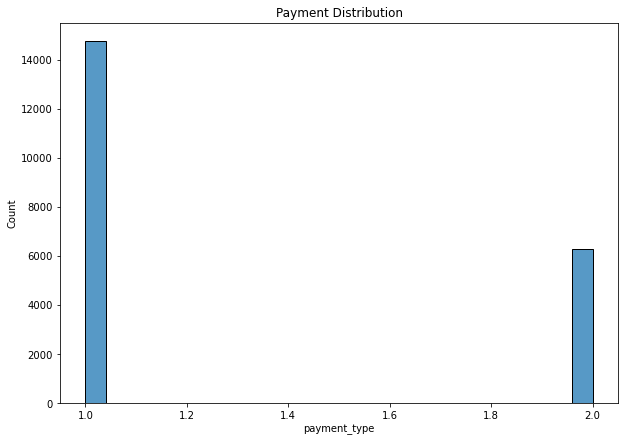

In [48]:
#Payment_type distribution
plt.figure(figsize=(10,7))
sns.histplot(data=data, x="payment_type", bins=25)
plt.title("Payment Distribution")
plt.show

- As we can see, most of the payment has been done through the Credit card as represented by first bar.

In [49]:
data.tip_amount.describe()

count    21032.000000
mean         2.064701
std          2.477187
min          0.000000
25%          0.000000
50%          1.750000
75%          2.760000
max         43.660000
Name: tip_amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

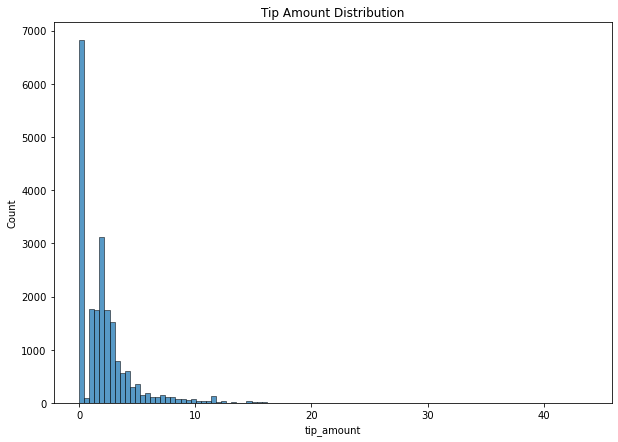

In [50]:
plt.figure(figsize=(10,7))
sns.histplot(data=data, x="tip_amount", bins=100)
plt.title("Tip Amount Distribution")
plt.show

- Taken into the consideration cases when we had tips we will have a Right-skewed distribution
- As we can see the number of the cases when we did not recieve tip is high almost 7000.


(0.0, 100.0)

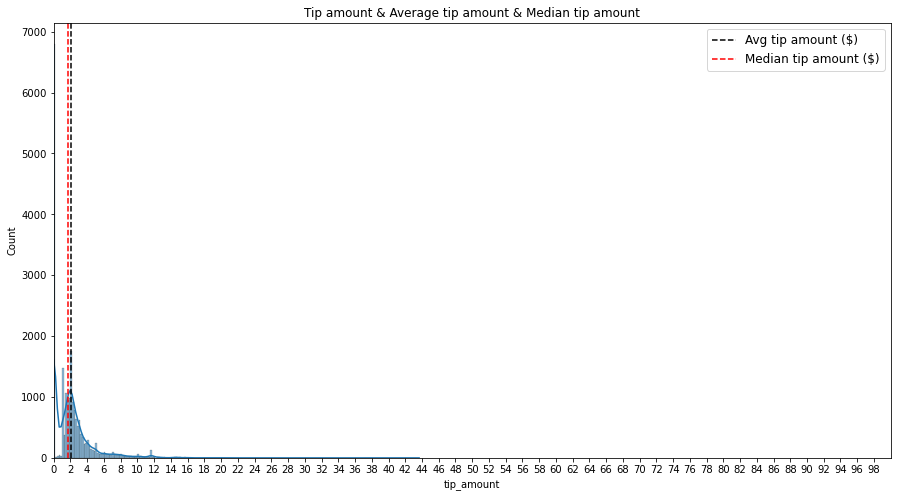

In [51]:
# Distribution of fare amount
sns.histplot(data=data,x="tip_amount",kde=True)
plt.axvline(data["tip_amount"].mean(),color = "k",
linestyle = "dashed",label = "Avg tip amount ($)")
plt.axvline(data["tip_amount"].median(),color = "r",
linestyle = "dashed",label = "Median tip amount ($)")
plt.title("Tip amount & Average tip amount & Median tip amount")
plt.xticks(np.arange(0, 100, step=2))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,100)

- Most of the tip amounts are on the band between 1 and 3.
- We can see that some tips have maximum value around 44.

In [52]:
data.tip_amount.describe()

count    21032.000000
mean         2.064701
std          2.477187
min          0.000000
25%          0.000000
50%          1.750000
75%          2.760000
max         43.660000
Name: tip_amount, dtype: float64

### Map Visualisation

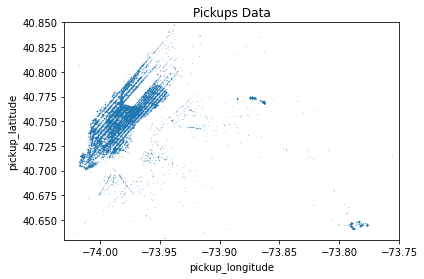

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()


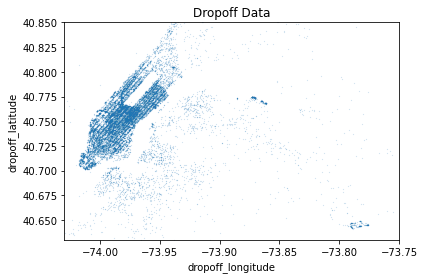

In [54]:
data.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [55]:
data.trip_distance.describe()

count    21032.000000
mean         3.565217
std          3.826763
min          1.000000
25%          1.430000
50%          2.120000
75%          3.800000
max         48.050000
Name: trip_distance, dtype: float64

(0.0, 100.0)

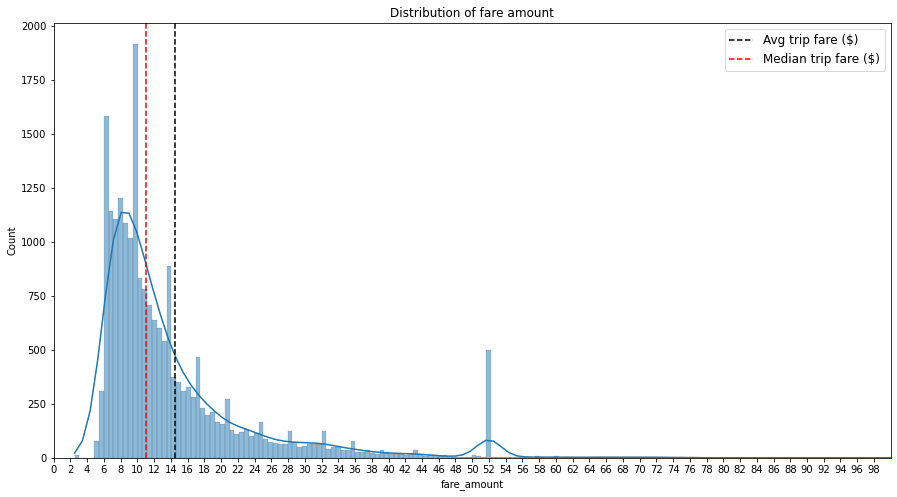

In [56]:
# Distribution of fare amount
sns.histplot(data=data,x="fare_amount",kde=True)
plt.axvline(data["fare_amount"].mean(),color = "k",
linestyle = "dashed",label = "Avg trip fare ($)")
plt.axvline(data["fare_amount"].median(),color = "r",
linestyle = "dashed",label = "Median trip fare ($)")
plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 100, step=2))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,100)

### Right-skewed distribution
- Most taxi fares range between (2.5-20) dollars.
- The average taxi fee varies between (8-10) dollars.
- There are some peaks observed at 52, that are representing fixed fees.


(0.0, 30.0)

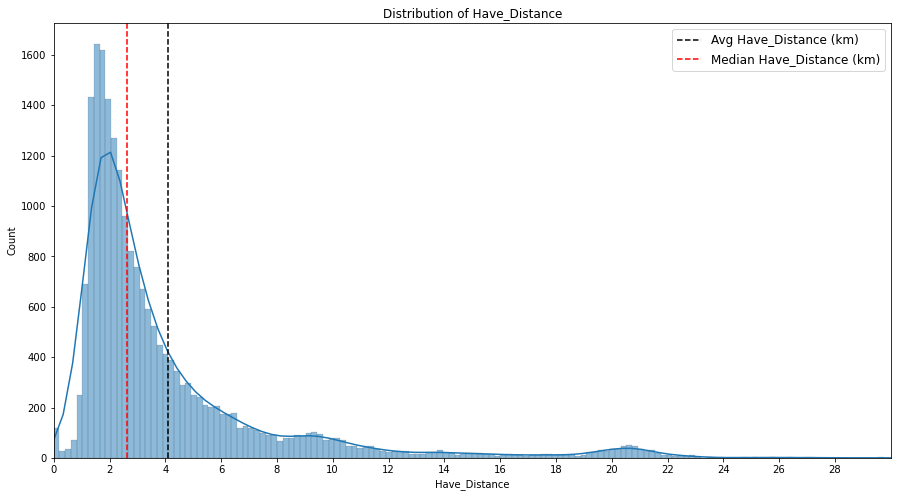

In [57]:
sns.histplot(data=data,x="Have_Distance",kde=True)
plt.axvline(data["Have_Distance"].mean(),color = "k",
linestyle = "dashed",label = "Avg Have_Distance (km)")
plt.axvline(data["Have_Distance"].median(),color = "r",
linestyle = "dashed",label = "Median Have_Distance (km)")
plt.title("Distribution of Have_Distance")
plt.xticks(np.arange(0, 30, step=2))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,30)


### Right-skewed distribution
- Most Passengers travel between 1 - 5 km by taxi.
- The average travelling distance is around 2km. 

In [58]:
data.tip_amount.describe()

count    21032.000000
mean         2.064701
std          2.477187
min          0.000000
25%          0.000000
50%          1.750000
75%          2.760000
max         43.660000
Name: tip_amount, dtype: float64

<AxesSubplot:title={'center':'tip_amount'}, xlabel='payment_type'>

<Figure size 1584x432 with 0 Axes>

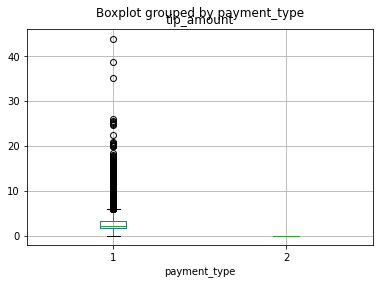

In [59]:
plt.figure(figsize=(22,6))
data.boxplot(column='tip_amount', by='payment_type')


- Most of the transactions are paid by credit card or cash.
- Tip paid by cash is mostly 0 because it was not recorded or logged by the taxi meter.

C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


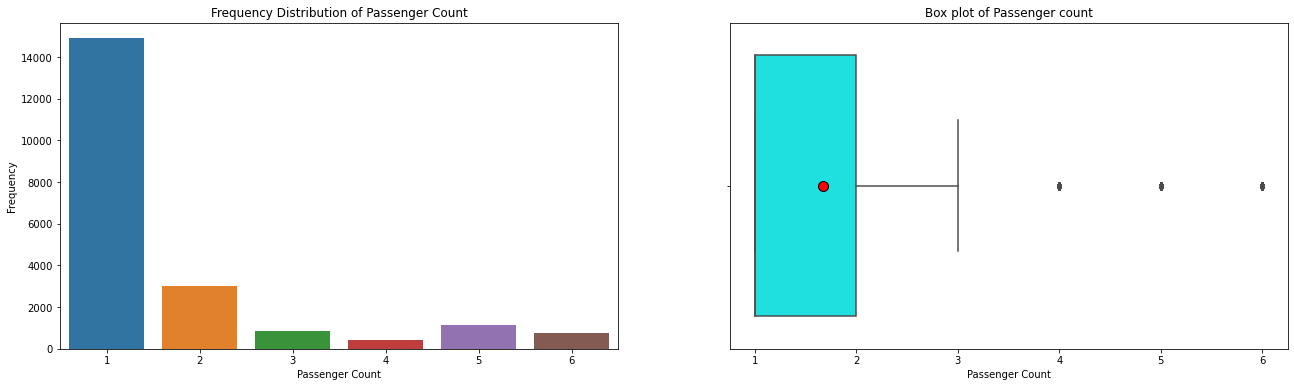

In [60]:

# Passenger Count
plt.figure(figsize=(22,6))
plt.subplot(121)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Passenger Count')

plt.subplot(122)
sns.boxplot(data['passenger_count'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title('Box plot of Passenger count');

- Most of the passengers are traveling alone.
- We have more than 2500 cases that 2-passengers are travelling together.
- The reset are pretty small compared with these two cases.

#### Does the number of the passengers affect the tip_amount???

Text(0.5, 1.0, 'Tip Amount vs Number of Passengers')

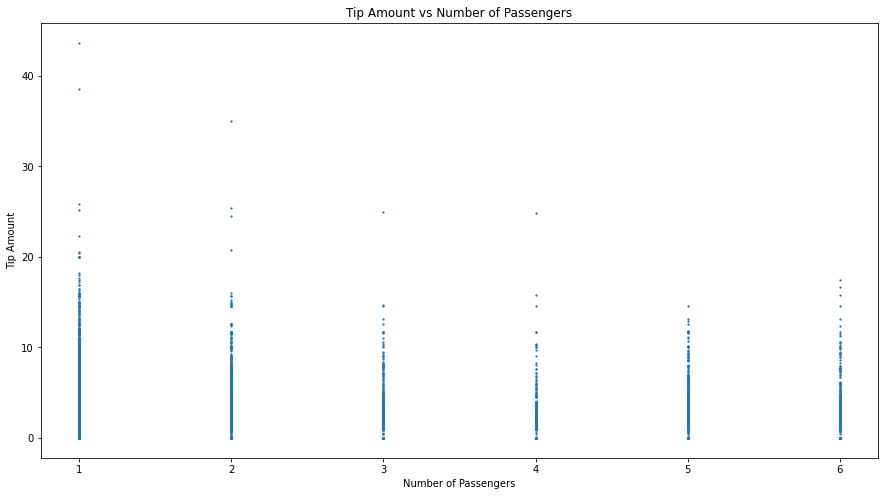

In [62]:
plt.figure(figsize=(15,8))
plt.scatter(x=data['passenger_count'], y=data['tip_amount'], s=1.5)
plt.xlabel('Number of Passengers')
plt.ylabel('Tip Amount')
plt.title("Tip Amount vs Number of Passengers")


- One-passenger taxi offers more tips compared with others

Text(0.5, 1.0, 'Tip Amount vs Hour of Day')

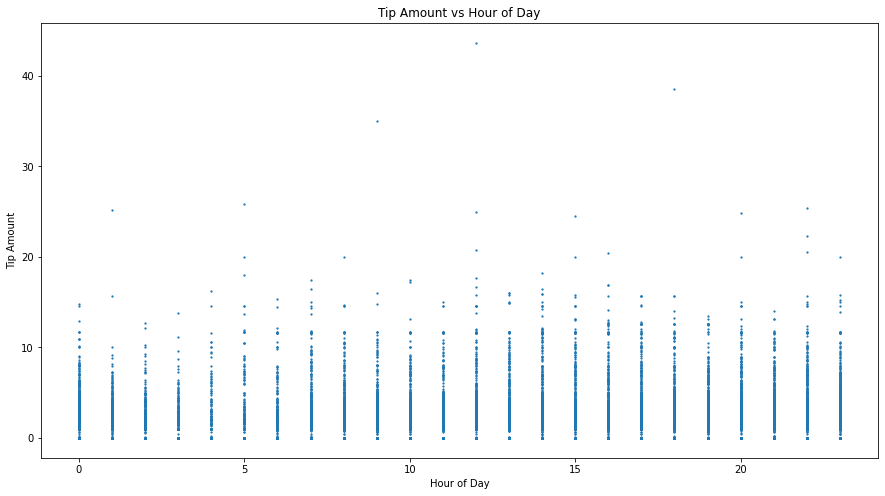

In [63]:
#Tip amount  vs day of month
plt.figure(figsize=(15,8))
plt.scatter(x=data['hour'], y=data['tip_amount'], s=1.5)
plt.xlabel('Hour of Day')
plt.ylabel('Tip Amount')
plt.title("Tip Amount vs Hour of Day")


- The tip amount is uniform throughout the month

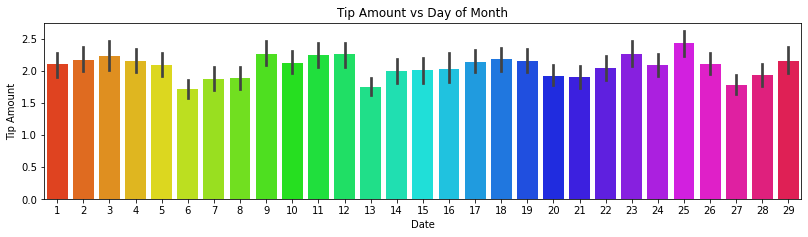

In [64]:
# Day of month

plt.figure(figsize=(22,6))
plt.subplot(223)
sns.barplot(x = data['day_of_month'], y = data['tip_amount'], palette = 'hsv')
plt.xlabel('Date')
plt.ylabel('Tip Amount')
plt.title ("Tip Amount vs Day of Month")
plt.tight_layout();

- Here we can see that the heighest tip amount is on the 3rd, 9th and 25th day of the month.
- The lowest is on the 6th and 13th day of the month.

Text(0, 0.5, 'Frequency')

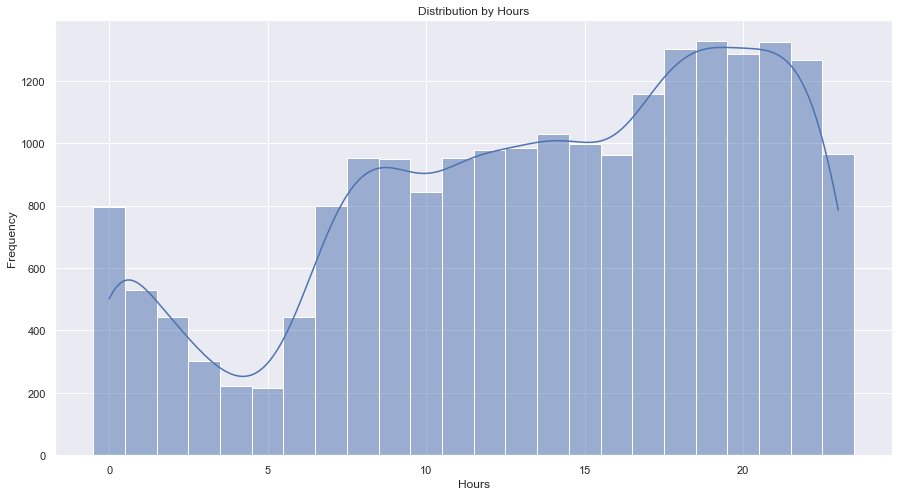

In [65]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=data, x="hour", stat="count", discrete=True, kde=True)
plt.title("Distribution by Hours")
plt.xlabel('Hours')
plt.ylabel('Frequency')

 - Taxi cars are rare around 5am and they reach the maximum around 7pm.

Text(0.5, 1.0, 'Trip Distance vs pickup hours of the day')

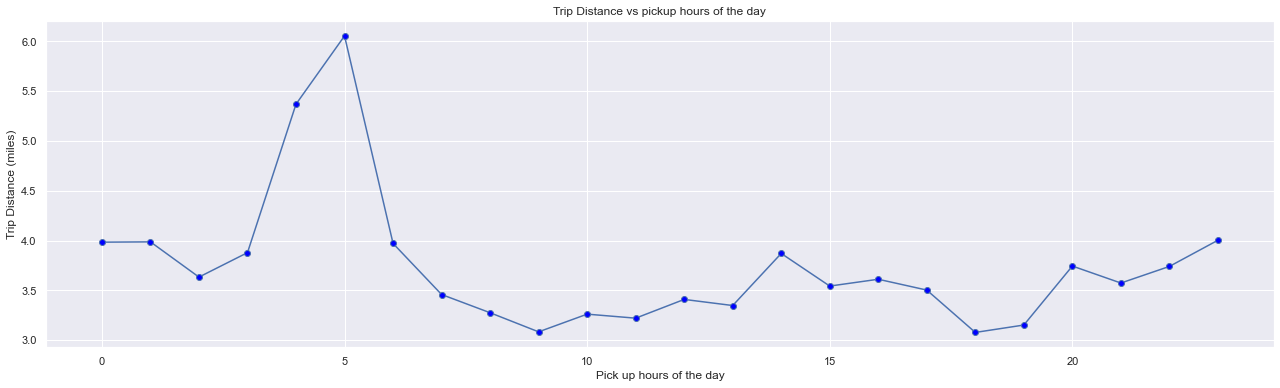

In [66]:
pickups=data.groupby('hour',as_index=False)['trip_distance'].mean()
plt.figure(figsize=(22,6))
plt.plot(pickups['hour'],pickups['trip_distance'],marker='o', markerfacecolor='blue', 
                      label='mean  trip distances')
plt.xlabel('Pick up hours of the day')
plt.ylabel('Trip Distance (miles)')
plt.title('Trip Distance vs pickup hours of the day')

- The relatively long-distance-trip of taxi takes place during 3am — 7 am.
- The relatively short-distance trip time range is 9 am-11am and 6pm-7pm which makes sense because that is the usual work and daily operation time.

C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency Distribution of Trip Duration')

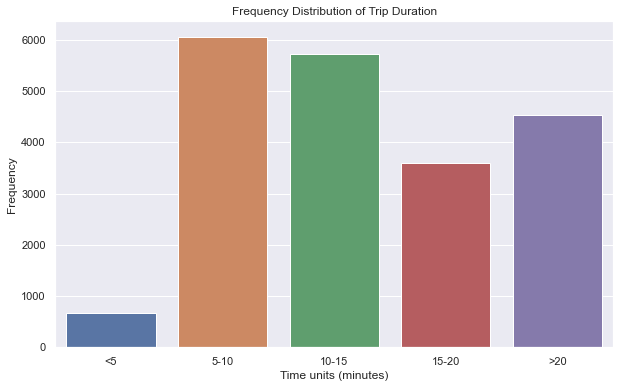

In [67]:
#trip duration
plt.figure(figsize=(22,6))
plt.subplot(121)
sns.countplot(data['trip_duration'])
plt.xlabel('Time units (minutes)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Trip Duration')


- Most of the trip lastes between 5 to 15 minutes.
- The mosy trips last between 5-10 minutes.
- The trips that last less than 5 minutes  happen less compared with others.

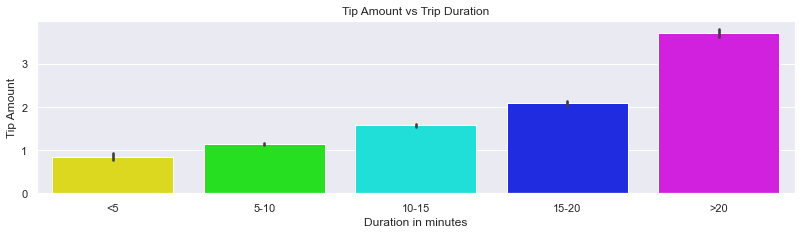

In [68]:
# Tip amount vs Trip Durations
plt.figure(figsize=(22,6))
plt.subplot(223)
sns.barplot(x = data['trip_duration'], y = data['tip_amount'], palette = 'hsv')
plt.xlabel('Duration in minutes')
plt.ylabel('Tip Amount')
plt.title ("Tip Amount vs Trip Duration")
plt.tight_layout();

- As we can see the tip amount is the highest when we have long duration of the trip.
- The Tip is proportionally depended on the trip duration. 

In [69]:
def time_formats(df, timeframes, value, color="blue"):
        """
          Function to count observation occurrence through different forms of time.
        """
        f, ax = plt.subplots(len(timeframes), figsize = [12,12])
        for i,x in enumerate(timeframes):
            df.loc[:,[x,value]].groupby([x]).mean().plot(ax=ax[i],color=color)
            ax[i].set_ylabel(value.replace("_", " ").title())
            ax[i].set_title("{} by {}".format(value.replace("_", " ").title(), x.replace("_", " ").title()))
            ax[i].set_xlabel("")
            plt.tight_layout(pad=0)

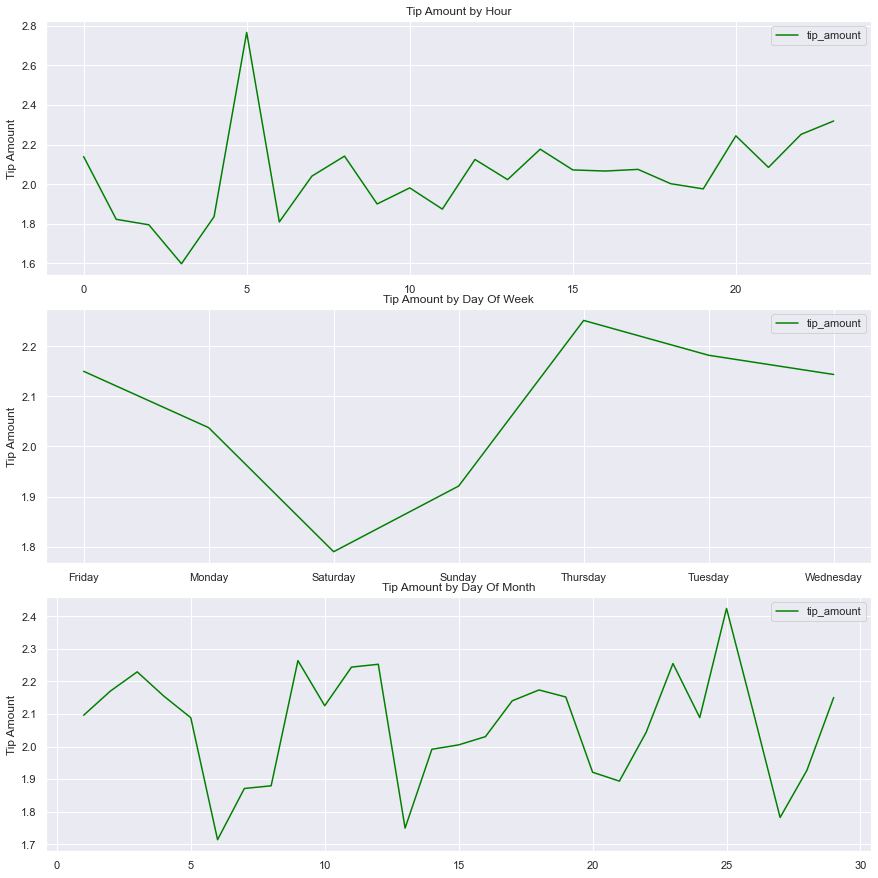

In [70]:
time_formats(df=data, timeframes=['hour', 'day_of_week','day_of_month' ], value = "tip_amount", color="green")


- The smaller the demand, the heigher the tip amount and vice versa
- The smalles tip amount on Saturday and the heighest on Thursday
- The peak of the tip amount is on the 25th of the month.

C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hourly Variation of Total number of pickups')

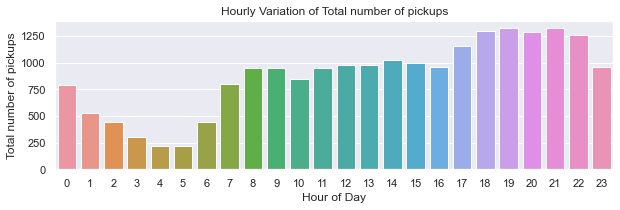

In [71]:
#Datetime features
plt.figure(figsize=(22,6))

# Hour of day
plt.subplot(221)
sns.countplot(data['hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')


C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weekly Variation of Total number of pickups')

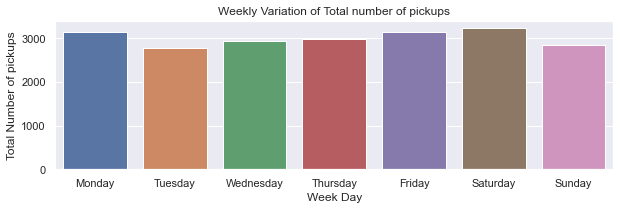

In [72]:
# Day of week

plt.figure(figsize=(22,6))
plt.subplot(222)
sns.countplot(data['day_of_week'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Daily Variation of Total number of pickups')

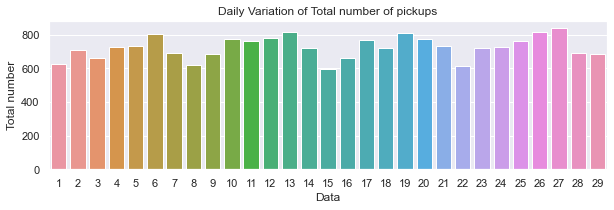

In [73]:
# Date
plt.figure(figsize=(22,6))
plt.subplot(221)
sns.countplot(data['day_of_month'])
plt.xlabel('Data')
plt.ylabel('Total number')
plt.title('Daily Variation of Total number of pickups')

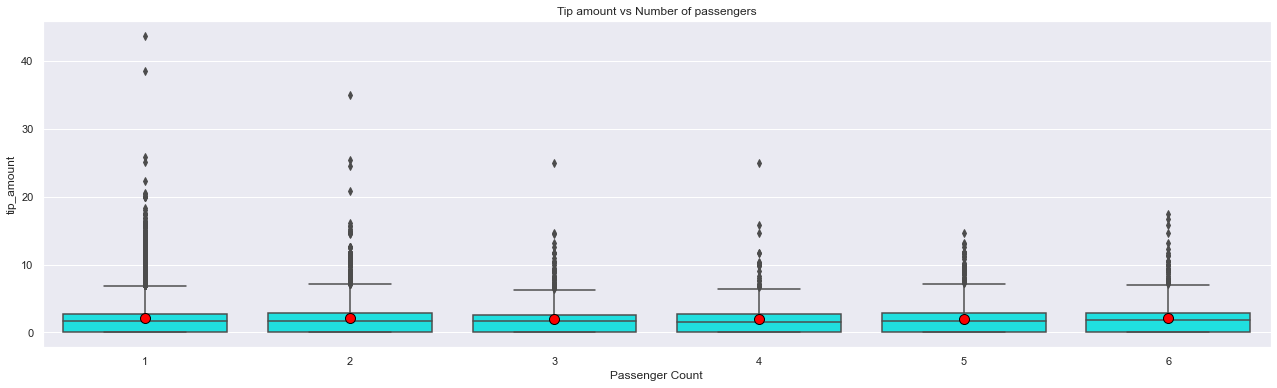

In [74]:
plt.figure(figsize=(22, 6))
sns.boxplot(x = data['passenger_count'],y = data['tip_amount'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("Tip amount vs Number of passengers");

- No significant variation of means between passenger counts.

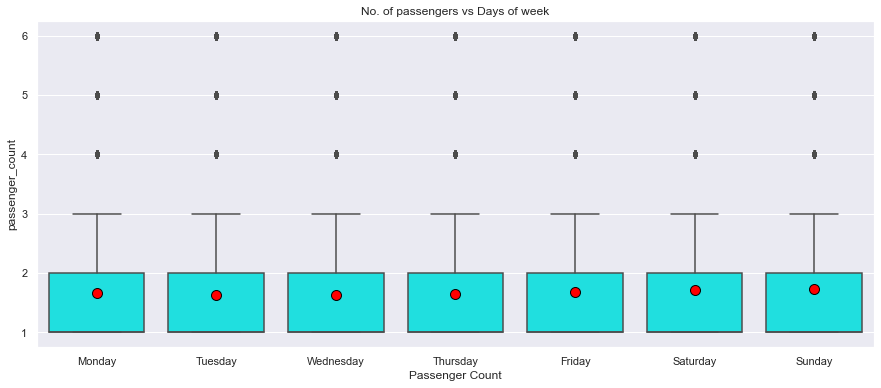

In [75]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = data['day_of_week'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],y = data['passenger_count'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("No. of passengers vs Days of week");

- The number of passengers is higher on the Weekend days compared with  each other day of working week.

C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


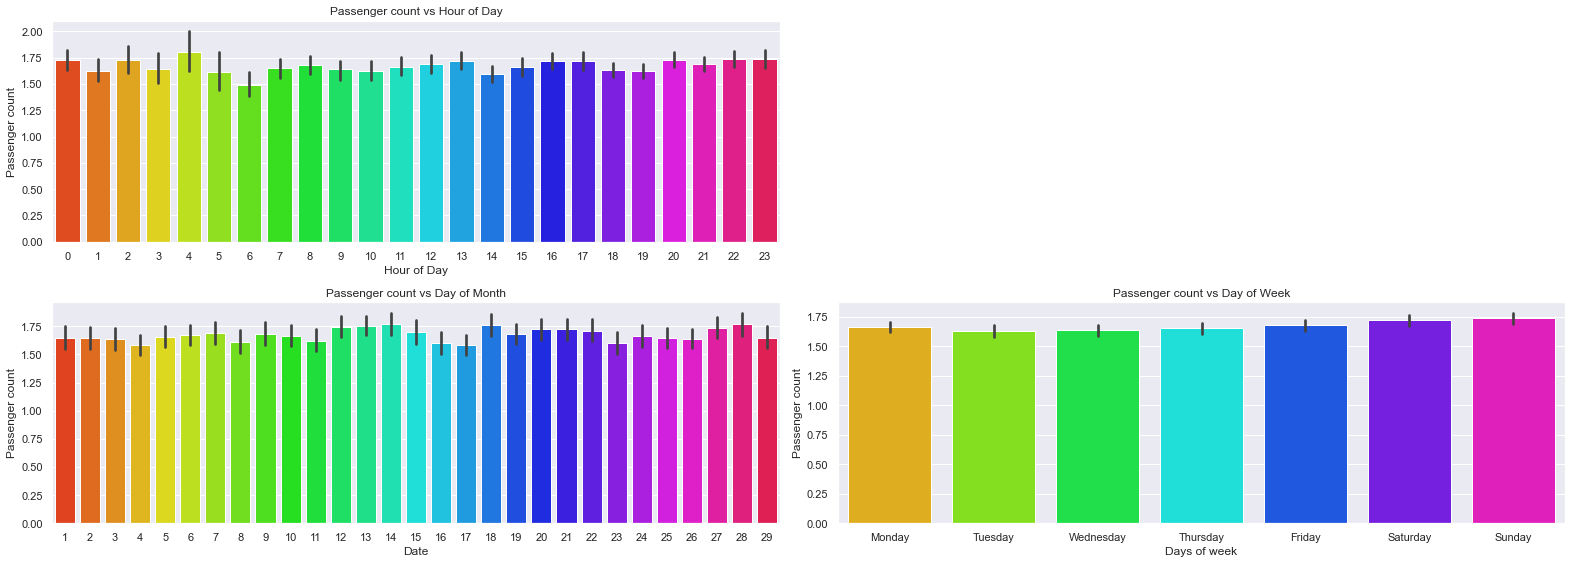

In [76]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sns.barplot(data['hour'], y = data['passenger_count'], palette = 'hsv')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Hour of Day")

# Day of week
plt.subplot(224)
sns.barplot(x = data['day_of_week'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = data['passenger_count'], palette = 'hsv')
plt.xlabel('Days of week')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Day of Week")

# Day of month
plt.subplot(223)
sns.barplot(x = data['day_of_month'], y = data['passenger_count'], palette = 'hsv')
plt.xlabel('Date')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Day of Month")
plt.tight_layout();

- We can see that during the 6-7 am and 2-3 pm we have less passengers compared with other hours.
- On the 7th, 13th, 14th, 18th and 27th days of month we have more passengers.
- During the weekends we have more passengers than other days of week


C:\Users\arben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


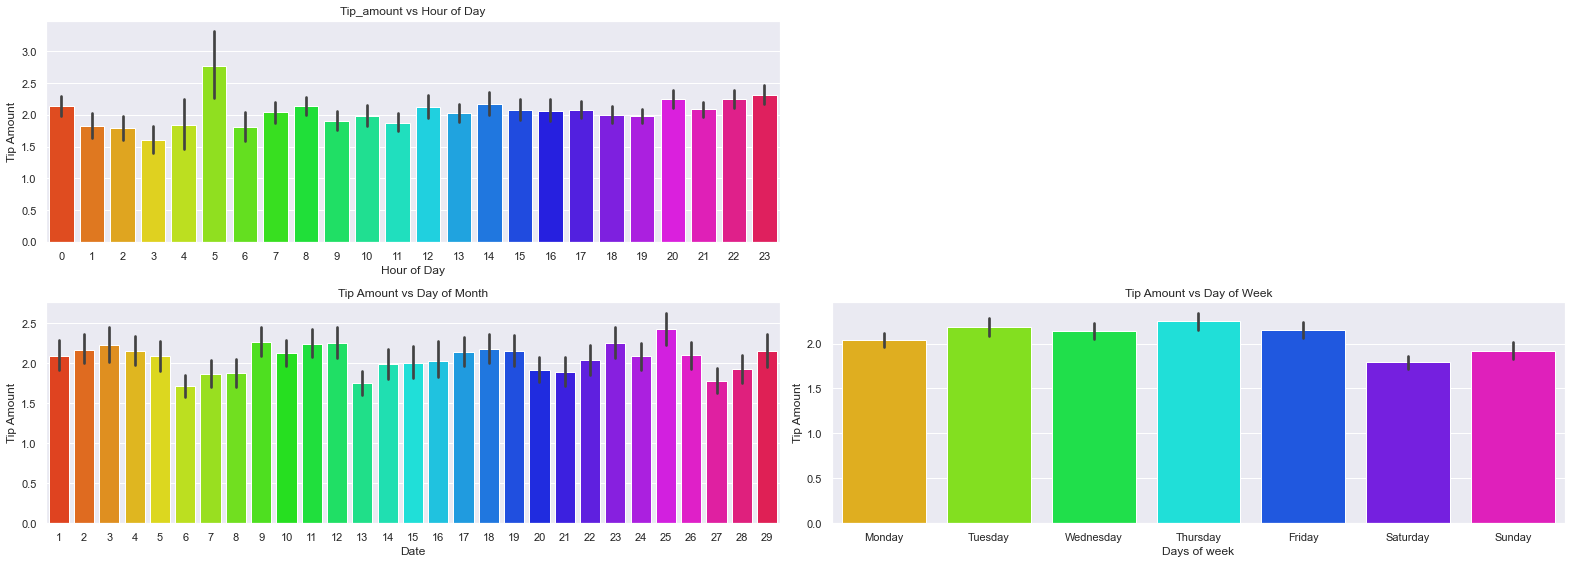

In [77]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sns.barplot(data['hour'], y = data['tip_amount'], palette = 'hsv')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Amount')
plt.title ("Tip_amount vs Hour of Day")

# Day of week
plt.subplot(224)
sns.barplot(x = data['day_of_week'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = data['tip_amount'], palette = 'hsv')
plt.xlabel('Days of week')
plt.ylabel('Tip Amount')
plt.title ("Tip Amount vs Day of Week")

# Day of month
plt.subplot(223)
sns.barplot(x = data['day_of_month'], y = data['tip_amount'], palette = 'hsv')
plt.xlabel('Date')
plt.ylabel('Tip Amount')
plt.title ("Tip Amount vs Day of Month")
plt.tight_layout();

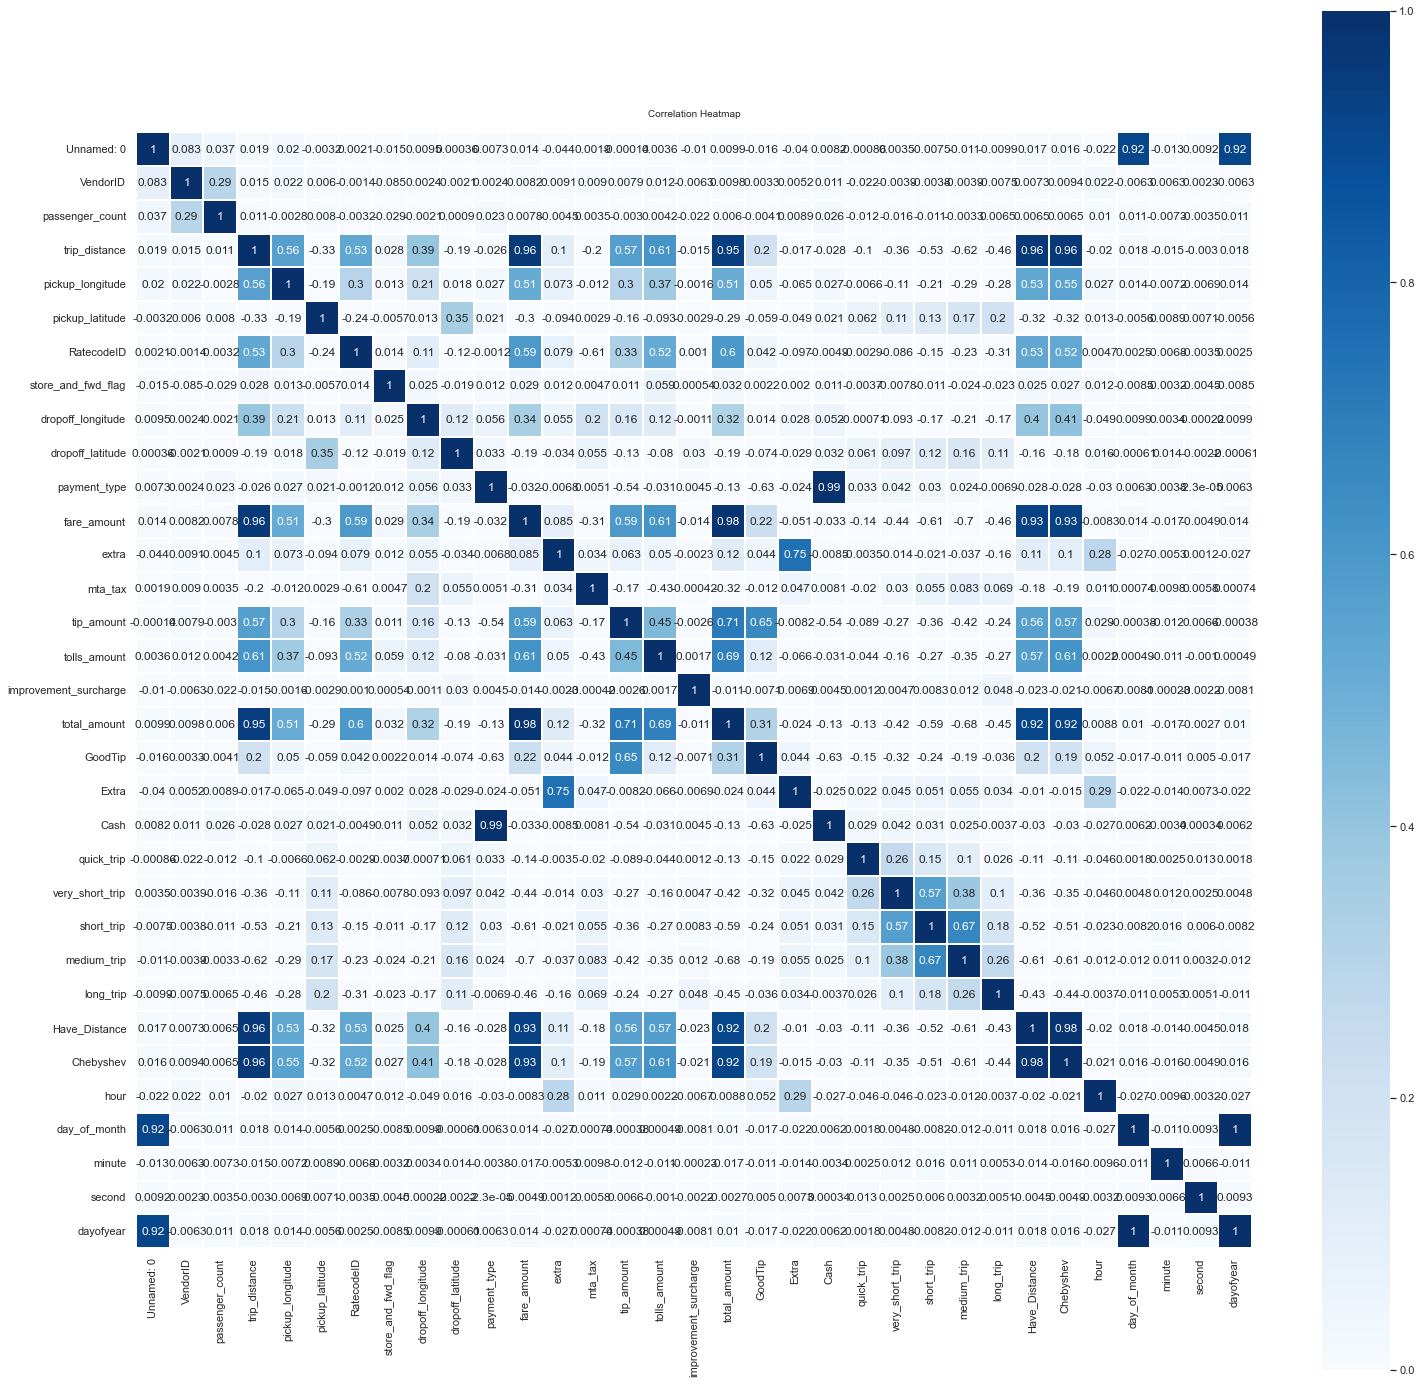

In [78]:
colormap = plt.cm.RdBu
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0,vmin=0,
square=True, cmap="Blues", linecolor='white', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=16);

In [79]:
data.Have_Distance.describe()

count    21032.000000
mean         4.105886
std          4.122556
min          0.000000
25%          1.768614
50%          2.630032
75%          4.609688
max         67.537549
Name: Have_Distance, dtype: float64

In [80]:
data=data.drop(data[data['Have_Distance']<1].index, axis=0)

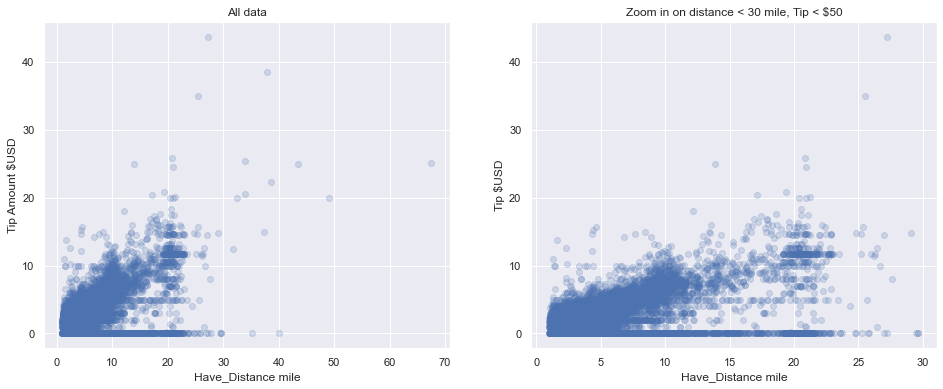

In [81]:
# scatter plot distance - tip
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(data.Have_Distance, data.tip_amount, alpha=0.2)
axs[0].set_xlabel('Have_Distance mile')
axs[0].set_ylabel('Tip Amount $USD')
axs[0].set_title('All data')
# zoom in on part of data
idx = (data.Have_Distance < 30) & (data.fare_amount < 100)
axs[1].scatter(data[idx].Have_Distance, data[idx].tip_amount, alpha=0.2)
axs[1].set_xlabel('Have_Distance mile')
axs[1].set_ylabel('Tip $USD')
axs[1].set_title('Zoom in on distance < 30 mile, Tip < $50');

### Data Preprocesing

In [82]:
data.drop([ 'tpep_pickup_datetime','tpep_dropoff_datetime','loc_1','loc_2'], axis=1, inplace=True)

In [83]:
data.drop([ 'trip_duration','day_of_week'], axis=1, inplace=True)

In [84]:
print(data.dtypes)

Unnamed: 0                 int64
VendorID                   int64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag         int64
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
GoodTip                     bool
Extra                       bool
Cash                        bool
quick_trip                 uint8
very_short_trip            uint8
short_trip                 uint8
medium_trip                uint8
long_trip                  uint8
Have_Distance            float64
Chebyshev                float64
hour                       int64
day_of_month               int64
minute    

- As we see we have some variables that have data type 'object' (mixed data type), that is not int or float.
- We  also have boolean values that we have to convert  in int or float

### Label Encoding
- Here we have to convert all  data types to int or float type, as we can see we have object and bool data types that we have to convert.

In [85]:
#importing the libraries for modeling
import math
from math import sqrt
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors
from sklearn import preprocessing
import xgboost as xgb


In [86]:
# label encoding
label_encoding = preprocessing.LabelEncoder()
label_encoding.fit(data['GoodTip'])
data['GoodTip']=label_encoding.transform(data['GoodTip'])
label_encoding.fit(data['Extra'])
data['Extra']=label_encoding.transform(data['Extra'])
label_encoding.fit(data['Cash'])
data['Cash']=label_encoding.transform(data['Cash'])

### Split Data

The next step consist on:
  - creating a sub-dataset with the elected  features and containing the target as well.
  - Feature scaling.
  - Splitting data into 2 parts into 80:20 ratio which I use respectively to train and test the model.

In [87]:
data_df=data.loc[:,['trip_distance','fare_amount','tolls_amount','tip_amount','total_amount','Have_Distance','Chebyshev','GoodTip']]

In [88]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X = data_df.iloc[:,data_df.columns != "tip_amount"]
y = data_df['tip_amount']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42, shuffle=True)

### Model 1- Linear Regression

In [89]:
def Linear_reg(X_train, X_valid, y_train, y_valid):
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_train_predict = linear.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared=False)
    y_valid_predict = linear.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_predict)
    RMSE_valid = mean_squared_error(y_valid, y_valid_predict, squared=False)
    return r2_train, r2_valid, linear,RMSE_train,RMSE_valid
r2_train, r2_valid, linear,RMSE_train,RMSE_valid = Linear_reg(X_train, X_valid, y_train, y_valid)
print("R^2 (train) : ", r2_train)
print("RMSE (train): ", RMSE_train)
print("R^2 (valid) : ", r2_valid)
print("RMSE (valid): ", RMSE_valid)

R^2 (train) :  0.9685474713067954
RMSE (train):  0.4392026025833751
R^2 (valid) :  0.9715671123002538
RMSE (valid):  0.4281743800289225


In [90]:
# Using the mean_absolute_percentage_error function
from sklearn.metrics import mean_absolute_percentage_error
y_valid_predict = linear.predict(X_valid)
error = mean_absolute_percentage_error(y_valid, y_valid_predict)
print(error)

449358080723411.3


In [91]:
#importance features LR model
print(sorted(list(zip(linear.coef_, X.columns))))


[(-0.8908097621011772, 'fare_amount'), (-0.8812978174937884, 'tolls_amount'), (-0.034649521406186316, 'Have_Distance'), (-0.023649443628440885, 'trip_distance'), (0.22142961507010325, 'GoodTip'), (0.9083830432867532, 'total_amount'), (2.1919222854403317, 'Chebyshev')]


### Model 2 - Decision Tree Regressor Model

In [93]:
dtr = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=10).fit(X_train, y_train)
y_valid_pred = dtr.predict(X_valid)
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print("RMSE: %f" % (rmse))
# Mean Squared Error
print("Mean squared error: %.2f"
% mean_squared_error(y_valid, y_valid_pred))
# R2 Score
print('Variance score: %.2f' % r2_score(y_valid, y_valid_pred))


RMSE: 0.568571
Mean squared error: 0.32
Variance score: 0.95


### Model 3- XGBoost

In [94]:
params = {
'max_depth': 7,
'gamma' :0,
'eta':.03,
'subsample': 1,
'colsample_bytree': 0.9,
'objective':'reg:linear',
'eval_metric':'rmse',
'silent': 0,
'verbosity' : 0,
'random_state' : 42
}


In [95]:
def XGBmodel(X_train,X_valid,y_train,y_valid,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_valid = xgb.DMatrix(X_valid,label=y_valid)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=550,
                    early_stopping_rounds=10,evals=[(matrix_valid,'valid')])
    return model

model = XGBmodel(X_train,X_valid,y_train,y_valid,params)


[0]	valid-rmse:2.91478
[1]	valid-rmse:2.83174
[2]	valid-rmse:2.75545
[3]	valid-rmse:2.67741
[4]	valid-rmse:2.60500
[5]	valid-rmse:2.53177
[6]	valid-rmse:2.46113
[7]	valid-rmse:2.39204
[8]	valid-rmse:2.32945
[9]	valid-rmse:2.26575
[10]	valid-rmse:2.20812
[11]	valid-rmse:2.14762
[12]	valid-rmse:2.08867
[13]	valid-rmse:2.03335
[14]	valid-rmse:1.97844
[15]	valid-rmse:1.92680
[16]	valid-rmse:1.88058
[17]	valid-rmse:1.83194
[18]	valid-rmse:1.78768
[19]	valid-rmse:1.74086
[20]	valid-rmse:1.69899
[21]	valid-rmse:1.65856
[22]	valid-rmse:1.61601
[23]	valid-rmse:1.57488
[24]	valid-rmse:1.53836
[25]	valid-rmse:1.49950
[26]	valid-rmse:1.46591
[27]	valid-rmse:1.43159
[28]	valid-rmse:1.39639
[29]	valid-rmse:1.36457
[30]	valid-rmse:1.33348
[31]	valid-rmse:1.30275
[32]	valid-rmse:1.27679
[33]	valid-rmse:1.24745
[34]	valid-rmse:1.21883
[35]	valid-rmse:1.19131
[36]	valid-rmse:1.16570
[37]	valid-rmse:1.14140
[38]	valid-rmse:1.11834
[39]	valid-rmse:1.09631
[40]	valid-rmse:1.07423
[41]	valid-rmse:1.05202
[4

In [96]:
y=model.predict(xgb.DMatrix(X_valid),ntree_limit=model.best_ntree_limit).tolist()

C:\Users\arben\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


<AxesSubplot:xlabel='X'>

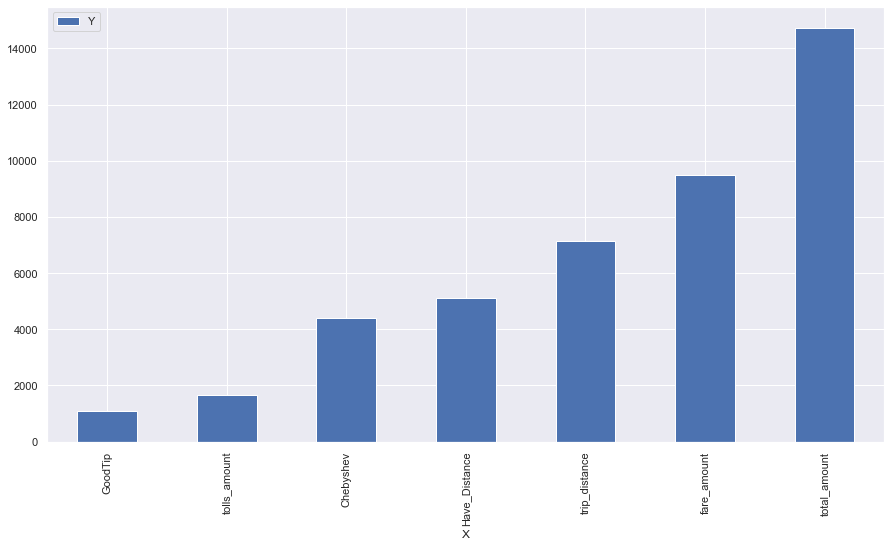

In [97]:
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')
